# Disease Classification using Machine Learning

# Table of Contents

1. [Introduction](#Introduction)
    - [Overview of the Dataset](#Overview-of-the-Dataset)
    - [Objectives of the Analysis](#Objectives-of-the-Analysis)
2. [Data Loading](#Data-Loading)
    - [Importing Libraries](#Importing-Libraries)
    - [Loading the Dataset](#Loading-the-Dataset)
3. [Data Inspection](#Data-Inspection)
    - [Initial Data Exploration](#Initial-Data-Exploration)
    - [Overview of Dataset](#Overview-of-Dataset)
    - [Data Information](#Data-Information)
    - [Analyzing Prognosis Distribution for Potential Class Imbalance](#class-imbalance-analysis)
    - [Summary Statistics](#Summary-Statistics)
    - [Missing Values](#Missing-Values)
    - [Duplicate Records](#Duplicate-Records)
4. [Data Transformation](#Data-Transformation)
    - [Feature Engineering](#Feature-Engineering)
5. [Data Visualization](#Data-Visualization)
    - [Symptom Frequency Distribution](#Sympton-Frequency-Distribution)

# Introduction
<a id="Introduction"></a>

## Overview of the Dataset
<a id="Overview-of-the-Dataset"></a>
In this project, we aim to predict the disease by analyzing different symptoms a person experiences, this is captured in the last column name 'prognosis'. We have around 132 parameters on which 42 different types of diseases can be predicted. 


## Objectives of the Analysis
<a id="Objectives-of-the-Analysis"></a>
The primary objective of this project is to develop a machine-learning model that can accurately classify and cluster diseases based on patient's symptoms. This can be used to a helping tool for medical staff to help patients all around the world. Best features should be identifies while creating of the ML model.

### Data Loading


##### import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
import missingno as msno

In [2]:
def read_train_data (train_file_path):
    # Load data and convert to pd
    train = pd.read_csv(train_file_path)
    return train

def read_test_data (test_file_path):
    # Load data and convert to pd
    test = pd.read_csv(test_file_path)
    return test

##### Loading the Dataset


In [3]:
train_data = read_train_data("data/Training.csv")
test_data = read_test_data("data/Testing.csv")

# Data Inspection
<a id="Data-Inspection"></a>
## Initial Data Exploration
<a id="Initial-Data-Exploration"></a>


In [4]:
# Initial data exploration
print("\n=== Initial Data Exploration ===")
print("First 5 rows of the dataset:")
print(train_data.head())


=== Initial Data Exploration ===
First 5 rows of the dataset:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0             

## Overview of Dataset
<a id="Overview-of-Dataset"></a>

In [5]:
# Overview of the dataset
print("=== Dataset Overview ===")
print(f"Shape of the dataset: {train_data.shape}")
print(f"Number of rows: {train_data.shape[0]}")
print(f"Number of columns: {train_data.shape[1]}")
print("\nColumn names and their data types:")
print(train_data.dtypes)
print("\nSummary of missing values in each column:")
print(train_data.isnull().sum())
print("\nBasic statistics of numerical columns:")
print(train_data.describe())
print("\nBasic statistics of categorical columns:")
print(train_data.describe(include=['object', 'category']))

=== Dataset Overview ===
Shape of the dataset: (4920, 134)
Number of rows: 4920
Number of columns: 134

Column names and their data types:
itching                   int64
skin_rash                 int64
nodal_skin_eruptions      int64
continuous_sneezing       int64
shivering                 int64
                         ...   
blister                   int64
red_sore_around_nose      int64
yellow_crust_ooze         int64
prognosis                object
Unnamed: 133            float64
Length: 134, dtype: object

Summary of missing values in each column:
itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

Basic statistics of numerical columns:
           itching    skin_rash  nodal_skin_eruptions 

## Data Information
<a id="Data-Information"></a>

In [6]:
# Display the info of the training dataset
print("\n=== Dataset Info ===")
print(train_data.info())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB
None


## Missing Values
<a id="Missing-Values"></a>

In [7]:
# Check for null values
print("\n=== Null Value Analysis ===")
null_values = train_data.isnull().sum()
print(null_values)
    
# Drop columns with null values and print the cleaned dataset
train_cleaned_columns = train_data.dropna(axis=1)
print("\nColumns after dropping those with null values:")
print(train_cleaned_columns.columns)
    
# Check again for null values in the cleaned dataset
print("\nNull values in the cleaned dataset:")
null_values_cleaned = train_cleaned_columns.isnull().sum()
print(null_values_cleaned)


=== Null Value Analysis ===
itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

Columns after dropping those with null values:
Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

Null values in the cleaned dataset:
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering     

## Analyzing Prognosis Distribution for Potential Class Imbalance
<a id="class-imbalance-analysis"></a>


=== Unique Values Analysis ===
Unique prognosis values:
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']

=== Prognosis Distribution Analysis ===

Prognosis counts (absolute):
prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tu

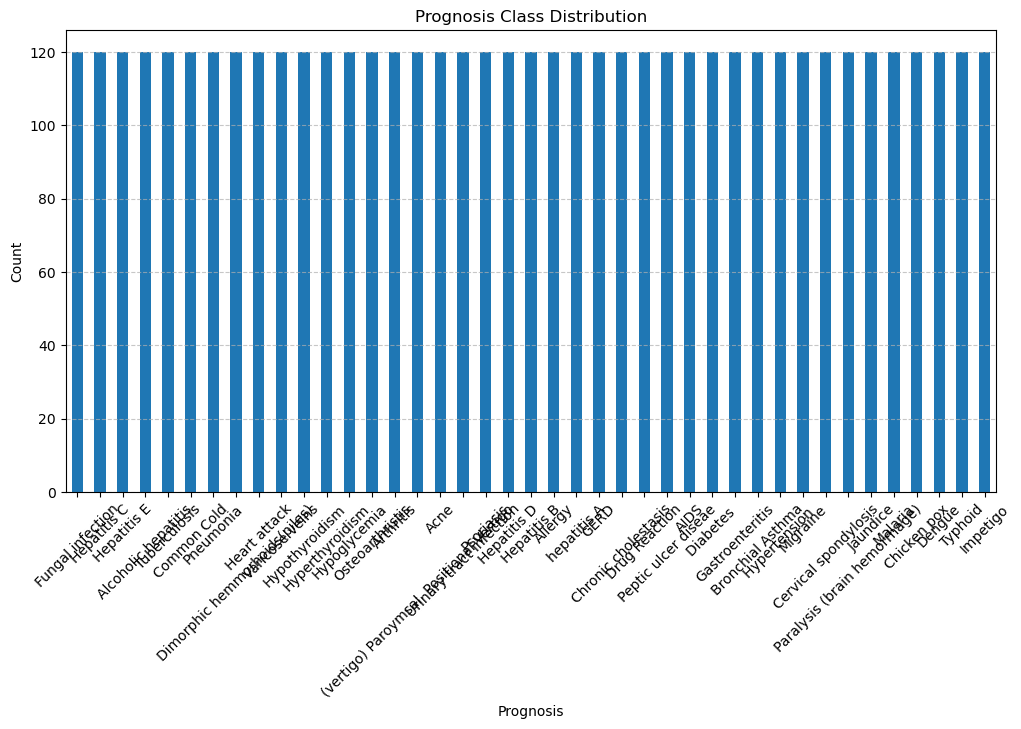

In [8]:
# Get unique prognosis values
print("\n=== Unique Values Analysis ===")
unique_prognosis = train_cleaned_columns["prognosis"].unique()
print("Unique prognosis values:")
print(unique_prognosis)
    
# Analyze prognosis distribution for class imbalance
print("\n=== Prognosis Distribution Analysis ===")
prognosis_counts = train_cleaned_columns["prognosis"].value_counts()
prognosis_percentage = train_cleaned_columns["prognosis"].value_counts(normalize=True) * 100
    
print("\nPrognosis counts (absolute):")
print(prognosis_counts)
print("\nPrognosis percentage distribution:")
print(prognosis_percentage)
    
# Check for class imbalance
print("\nClass imbalance analysis:")
max_class_percentage = prognosis_percentage.max()
min_class_percentage = prognosis_percentage.min()
print(f"Most common class percentage: {max_class_percentage:.2f}%")
print(f"Least common class percentage: {min_class_percentage:.2f}%")
if max_class_percentage / min_class_percentage > 2:
    print("Potential class imbalance detected.")
else:
    print("No significant class imbalance detected.")
    
# Visualize prognosis distribution
print("\nVisualizing prognosis distribution...")
plt.figure(figsize=(12, 6))
prognosis_counts.plot(kind="bar")
plt.title("Prognosis Class Distribution")
plt.xlabel("Prognosis")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Summary Statistics
<a id="Summary-Statistics"></a>


In [9]:
# Summary statistics for numerical columns in cleaned dataset
print("\n=== Summary Statistics of Cleaned Dataset ===")
print(train_cleaned_columns.describe())


=== Summary Statistics of Cleaned Dataset ===
           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.

In [10]:
 # Check for duplicate records and show them
print("\n=== Duplicate Records Analysis ===")
duplicate_records = train_cleaned_columns[train_cleaned_columns.duplicated()]
num_duplicates = len(duplicate_records)
print(f"Number of duplicate records: {num_duplicates}")
if num_duplicates > 0:
    print("\nDuplicate records:")
    print(duplicate_records)


=== Duplicate Records Analysis ===
Number of duplicate records: 4616

Duplicate records:
      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
5           0          1                     1                    0   
6           1          0                     1                    0   
7           1          1                     0                    0   
8           1          1                     1                    0   
9           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidit

# Data Transformation
<a id="Data-Transformation"></a>
## Feature Engineering
<a id="Feature-Engineering"></a>


In [11]:
def process_melted_data():
    # Get all columns except 'prognosis' and 'Unnamed: 133'
    value_columns = train_data.columns.difference(['prognosis', 'Unnamed: 133']).tolist()
    
    # Melt the dataset based on the 'prognosis' column and value_columns
    melted_train_data = train_data.melt(id_vars=['prognosis'], value_vars=value_columns)
    
    # Group by 'prognosis' and 'variable', and sum the 'value'
    melted_train_data = melted_train_data.groupby(['prognosis', 'variable']).sum('value')
    
    # Filter the data to keep only rows where 'value' > 0
    melted_train_data = melted_train_data[melted_train_data['value'] > 0]
    
    # Return the processed data
    return melted_train_data

# Data Visualization
<a id="Data-Visualization"></a>
## Symptom Frequency Distribution
<a id="Sympton-Frequency-Distribution"></a>